# Income Prediction Problem
In this Notebook, I am working through the Income Prediction problem associated with the Adult Income Census dataset. The goal is to accurately predict whether or not someone is making more or less than $50,000 a year. While working through this problem, I am following a framework I use to attack all my machine learning problems. It includes the following steps:
- Load Libraries
- Load Data
- Analyze Data
- Feature Engineering
- Modeling
- Algorithm Tuning
- Finalizing the Model

## 1. Load Libaraies
First, we need to load all of our libraries we will use for this project.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

sns.set(style='white', context='notebook', palette='deep')

## 2. Load Data
Next, we load our data.

In [11]:
dataset = pd.read_csv("C:/Users/Florian/Documents/2018-2019/Python/adult.csv")

# Check for Null Data
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [12]:
dataset.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [14]:
# Replace All Null Data in NaN
dataset = dataset.replace("?", np.nan)
dataset.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K


In [16]:
dataset = dataset.dropna()
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [17]:
# Get data types
dataset.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [15]:
# Peek at data
dataset.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [18]:
# Reformat Column We Are Predicting
dataset['income']=dataset['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
dataset.head(20)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,1
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,0
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,1
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,1
12,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States,1


## 3. Analyze Data

In [19]:
# Identify Numeric features
numeric_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','income']

# Identify Categorical features
cat_features = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native']

### 3.1. Numeric Data Analysis

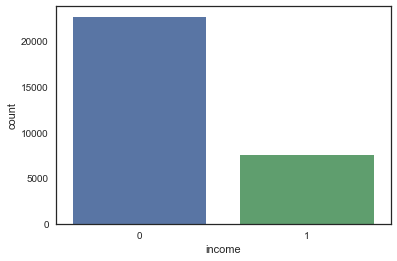

In [20]:
# Count of >50K & <=50K
sns.countplot(dataset['income'],label="Count")


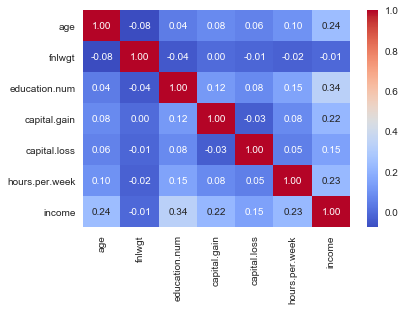

In [21]:
# Correlation matrix between numerical values
g = sns.heatmap(dataset[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")


C:\Users\Florian\Documents\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


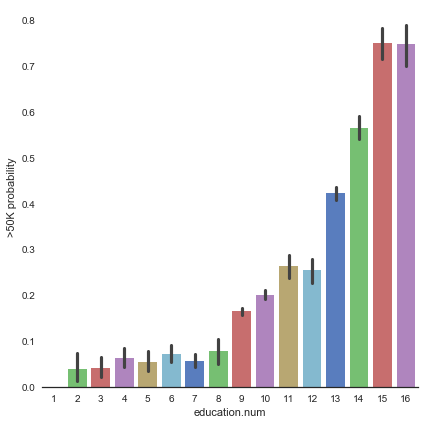

In [22]:
# Explore Education Num vs Income
g = sns.factorplot(x="education.num",y="income",data=dataset,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

C:\Users\Florian\Documents\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


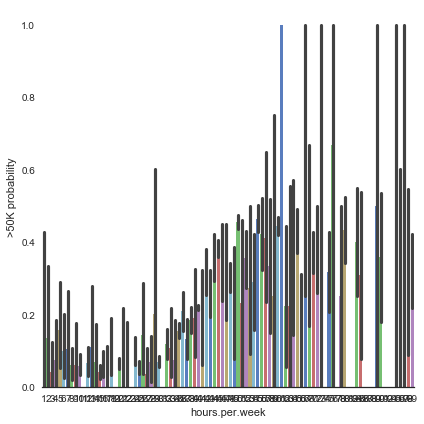

In [23]:
# Explore Hours Per Week vs Income
g  = sns.factorplot(x="hours.per.week",y="income",data=dataset,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

C:\Users\Florian\Documents\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Florian\Documents\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Florian\Documents\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


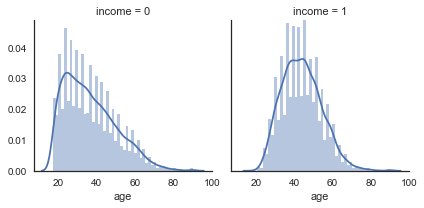

In [24]:
# Explore Age vs Income
g = sns.FacetGrid(dataset, col='income')
g = g.map(sns.distplot, "age")

### 3.2. Categorical Data Analysis

In [25]:
# Fill Missing Category Entries
dataset["workclass"] = dataset["workclass"].fillna("X")
dataset["occupation"] = dataset["occupation"].fillna("X")
dataset["native.country"] = dataset["native.country"].fillna("United-States")

# Confirm All Missing Data is Handled
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

C:\Users\Florian\Documents\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


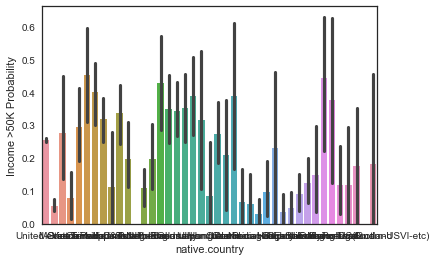

In [26]:
# Explore Native Nation vs Income
g = sns.barplot(x="native.country",y="income",data=dataset)
g = g.set_ylabel("Income >50K Probability")


C:\Users\Florian\Documents\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


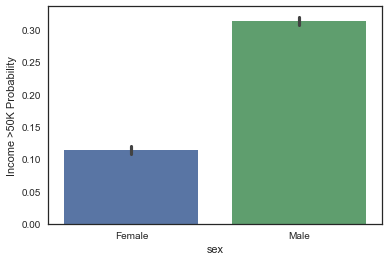

In [27]:
# Explore Sex vs Income
g = sns.barplot(x="sex",y="income",data=dataset)
g = g.set_ylabel("Income >50K Probability")

C:\Users\Florian\Documents\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


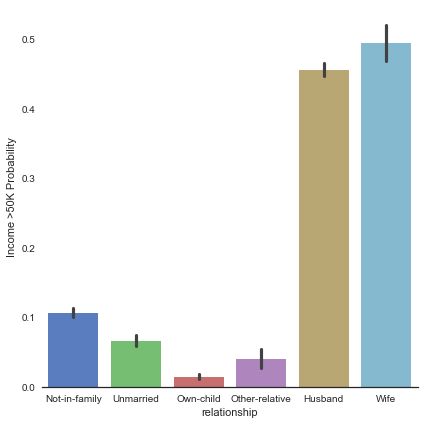

In [28]:
# Explore Relationship vs Income
g = sns.factorplot(x="relationship",y="income",data=dataset,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")

C:\Users\Florian\Documents\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


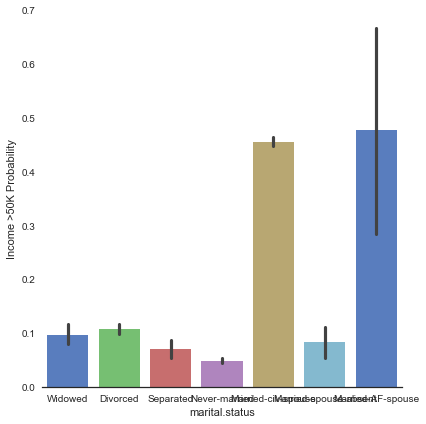

In [29]:
# Explore Marital Status vs Income
g = sns.factorplot(x="marital.status",y="income",data=dataset,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")

C:\Users\Florian\Documents\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


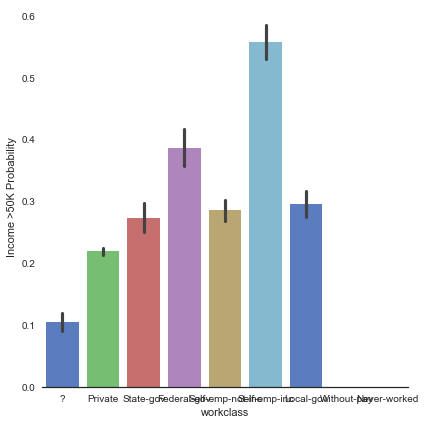

In [35]:
# Explore Workclass vs Income
g = sns.factorplot(x="workclass",y="income",data=dataset,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")

## 4. Feature Engineering

In [30]:
####################################################
############### FEATURE ENGINEERING ################
####################################################
# Convert Sex value to 0 and 1
dataset["sex"] = dataset["sex"].map({"Male": 0, "Female":1})

# Create Married Column - Binary Yes(1) or No(0)
dataset["marital.status"] = dataset["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
dataset["marital.status"] = dataset["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
dataset["marital.status"] = dataset["marital.status"].map({"Married":1, "Single":0})
dataset["marital.status"] = dataset["marital.status"].astype(int)

# Drop the data you don't want to use
dataset.drop(labels=["workclass","education","occupation","relationship","race","native.country"], axis = 1, inplace = True)
print('Dataset with Dropped Labels')
print(dataset.head())

Dataset with Dropped Labels
   age  fnlwgt  education.num  marital.status  sex  capital.gain  \
1   82  132870              9               0    1             0   
3   54  140359              4               0    1             0   
4   41  264663             10               0    1             0   
5   34  216864              9               0    1             0   
6   38  150601              6               0    0             0   

   capital.loss  hours.per.week  income  
1          4356              18       0  
3          3900              40       0  
4          3900              40       0  
5          3770              45       0  
6          3770              40       0  


## 5. Modeling

In [37]:
###################################################
##################### MODELING #####################
####################################################
# Split-out Validation Dataset and Create Test Variables
array = dataset.values
X = array[:,0:8]
Y = array[:,8]
print('Split Data: X')
print(X)
print('Split Data: Y')
print(Y)
validation_size = 0.20
seed = 7
num_folds = 10
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,
    test_size=validation_size,random_state=seed)

# Params for Random Forest
num_trees = 100
max_features = 3

#Spot Check 5 Algorithms (LR, LDA, KNN, CART, GNB, SVM)
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
#models.append(('SVM', SVC()))
# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Split Data: X
[[    90  77053      9 ...      0   4356     40]
 [    82 132870      9 ...      0   4356     18]
 [    66 186061     10 ...      0   4356     40]
 ...
 [    40 154374      9 ...      0      0     40]
 [    58 151910      9 ...      0      0     40]
 [    22 201490      9 ...      0      0     20]]
Split Data: Y
[0 0 0 ... 1 0 0]


C:\Users\Florian\Documents\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Florian\Documents\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Florian\Documents\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Florian\Documents\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Florian\Documents\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be ch

LR: 0.796453 (0.004186)
LDA: 0.829507 (0.004318)
KNN: 0.774455 (0.005765)
CART: 0.807126 (0.006120)
NB: 0.794303 (0.003642)
RF: 0.840602 (0.005218)


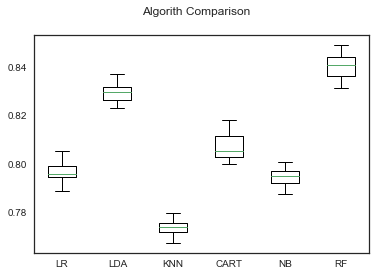

In [41]:
fig = plt.figure()
fig.suptitle('Algorith Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## 6. Algorithm Tuning

In [43]:
####################################################
################ ALGORITHM TUNING ##################
####################################################

#Commented Out to Reduce Script Time - Took 20 Minutes to run.
#best n_estimator = 250
#best max_feature = 3
# Tune Random Forest
n_estimators = np.array([50,100,150,200,250])
max_features = np.array([1,2,3,4,5])
param_grid = dict(n_estimators=n_estimators,max_features=max_features)
model = RandomForestClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.842406 using {'max_features': 3, 'n_estimators': 250}
0.838721 (0.005188) with: {'max_features': 1, 'n_estimators': 50}
0.839681 (0.005067) with: {'max_features': 1, 'n_estimators': 100}
0.840256 (0.006000) with: {'max_features': 1, 'n_estimators': 150}
0.840256 (0.005575) with: {'max_features': 1, 'n_estimators': 200}
0.840333 (0.004015) with: {'max_features': 1, 'n_estimators': 250}
0.839642 (0.006093) with: {'max_features': 2, 'n_estimators': 50}
0.841139 (0.005094) with: {'max_features': 2, 'n_estimators': 100}
0.840717 (0.005405) with: {'max_features': 2, 'n_estimators': 150}
0.840487 (0.004485) with: {'max_features': 2, 'n_estimators': 200}
0.840909 (0.005537) with: {'max_features': 2, 'n_estimators': 250}
0.840794 (0.005178) with: {'max_features': 3, 'n_estimators': 50}
0.841216 (0.005004) with: {'max_features': 3, 'n_estimators': 100}
0.841792 (0.005035) with: {'max_features': 3, 'n_estimators': 150}
0.840564 (0.004933) with: {'max_features': 3, 'n_estimators': 200}
0.8

## 7. Finalize Model

In [44]:
####################################################
################# FINALIZE MODEL ###################
####################################################
# 5. Finalize Model
# a) Predictions on validation dataset - KNN
random_forest = RandomForestClassifier(n_estimators=250,max_features=3)
random_forest.fit(X_train, Y_train)
predictions = random_forest.predict(X_validation)
print("Accuracy: %s%%" % (100*accuracy_score(Y_validation, predictions)))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy: 84.58467680024566%
[[4573  391]
 [ 613  936]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4964
           1       0.71      0.60      0.65      1549

   micro avg       0.85      0.85      0.85      6513
   macro avg       0.79      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513

